In [1]:
import comat
import numpy as np
import pandas as pd


data_path = "./census/"

income_data = pd.read_csv(data_path+'census-income.data', sep=',', header=None)


#pf.columns = col_names
#change column names
new_col_names =['age', 'class_of_worker', 'industry_code', 'occupation_code', 'education', 'wage_per_hour', 'enrolled_in_edu_inst_last_week', 'marital_status', 'major_industry_code', 'major_occupation_code', 'race', 'hispanic_origin', 'sex', 'member_of_labor_union', 'reason_for_unemployment', 'employment_status', 'capital_gains', 'capital_losses', 'dividends', 'tax_filer_status', 'previous_residence_region', 'previous_residence_state', 'detailed_household_summary_stat','detailed_household_summary_household',  'what2', 'migration_msa_change', 'migration_reg_change', 'migration_within_reg_change', 'live_in_this_house_1yr_ago', 'previous_residence_sunbelt', 'num_persons_worked_for_employer', 'family_members_under_18', 'birthplace_father', 'birthplace_mother', 'birthplace_self', 'citizenship', 'self_employed', 'veteran_questionnaire_filler', 'veterans_benefits', 'weeks_worked_in_year', 'year', 'target']
#print(new_col_names)
income_data.columns = new_col_names 


In [2]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(income_data,income_data.target,test_size=0.2, random_state=1500)


In [3]:

def income_data_prep(income_data):
    '''
    input: data frame. here the data propressing is customized for bank data
    '''
    income_data.dropna(inplace=True)  
    
    #remove useless columns
    re_corr_cols= ['industry_code', 'occupation_code', 'education', 'wage_per_hour',"detailed_household_summary_stat","what2"]
    income_data.drop(re_corr_cols,axis=1,inplace=True)
    
    # we found out that clients from year 1995, the entire re_miss_cols has missing values
    re_miss_cols = ['migration_msa_change','migration_reg_change', 'migration_within_reg_change','previous_residence_sunbelt']
    income_data.drop(re_miss_cols,axis=1,inplace=True)   
    
    # Remove leading and trailing whitespace from all values in the dataframe
    income_data = income_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

    # change ['hispanic_origin'] NA to "Do not know"
    income_data['hispanic_origin'] = income_data['hispanic_origin'].replace("NA", "Do not know")
    
    #change the number to string for object features

    # define a dictionary to map numerical values to string values
    employ_map = {0: 'employee', 1: 'selfemployed',2: 'ownbusiness'}
    # use the replace method to map numerical values to string values
    income_data["self_employed"] = income_data["self_employed"].replace(employ_map)
    
    veterans_map = {0: 'A',1: 'B', 2: 'C'}
    # use the replace method to map numerical values to string values
    income_data['veterans_benefits'] = income_data['veterans_benefits'].replace(veterans_map)

    
    year_map = {94: '1994', 95: '1995'}
    # use the replace method to map numerical values to string values
    income_data['year'] = income_data['year'].replace(year_map)
    
    # get the list of columns that contain '?'    
    cols_with_question_mark =income_data.applymap(lambda x: isinstance(x, str) and '?' in x).any()
    columns_to_replace = cols_with_question_mark[cols_with_question_mark == True].index.tolist()
    #print(columns_to_replace)
    for column in columns_to_replace:
         income_data[column] = income_data[column].replace('?', np.nan)
    
    # replace "?" with NA
   # income_data.replace({'?', np.NaN}, inplace=True)
    #remove NAs
    income_data.dropna(inplace=True)
    
    # change the target values 
    income_data["target"]=  np.where(income_data["target"] =="50000+.",1,0)

    # Get all categorical features
    cat_columns = list(income_data.columns[income_data.dtypes=='object'])   
    # cat_columns.remove('target')
    
    #remove NA string
    #income_data.replace('NA', np.nan, inplace=True)
    #income_data.dropna(inplace=True)

    return(income_data,cat_columns)


In [4]:
#data pre-processing 
#data pre-processing 
df_income, cat_cols=income_data_prep(X_train)
df_income_test, cat_cols = income_data_prep(X_test)


y_train = df_income.target
y_test = df_income_test.target

In [5]:
co_ma = comat.create_cooccurrence_matrix_diag(cat_cols,df_income[cat_cols])

[[0.04       0.         0.00971699 ... 0.03629485 0.00321864 0.00048651]
 [0.         0.04       0.00958058 ... 0.03604568 0.00335746 0.00059686]
 [0.02006742 0.01993258 0.04       ... 0.04       0.         0.        ]
 ...
 [0.01999492 0.02000508 0.01067026 ... 0.04       0.         0.        ]
 [0.01950387 0.02049613 0.         ... 0.         0.04       0.        ]
 [0.01788964 0.02211036 0.         ... 0.         0.         0.04      ]]
                                    1994      1995         A        Abroad   
1994                            0.040000  0.000000  0.009717  4.285902e-04  \
1995                            0.000000  0.040000  0.009581  0.000000e+00   
A                               0.020067  0.019933  0.040000  1.881150e-04   
Abroad                          0.041429  0.000000  0.008805  4.142915e-02   
Adm support including clerical  0.020122  0.019878  0.000000  9.386407e-05   
...                                  ...       ...       ...           ...   
Yes       

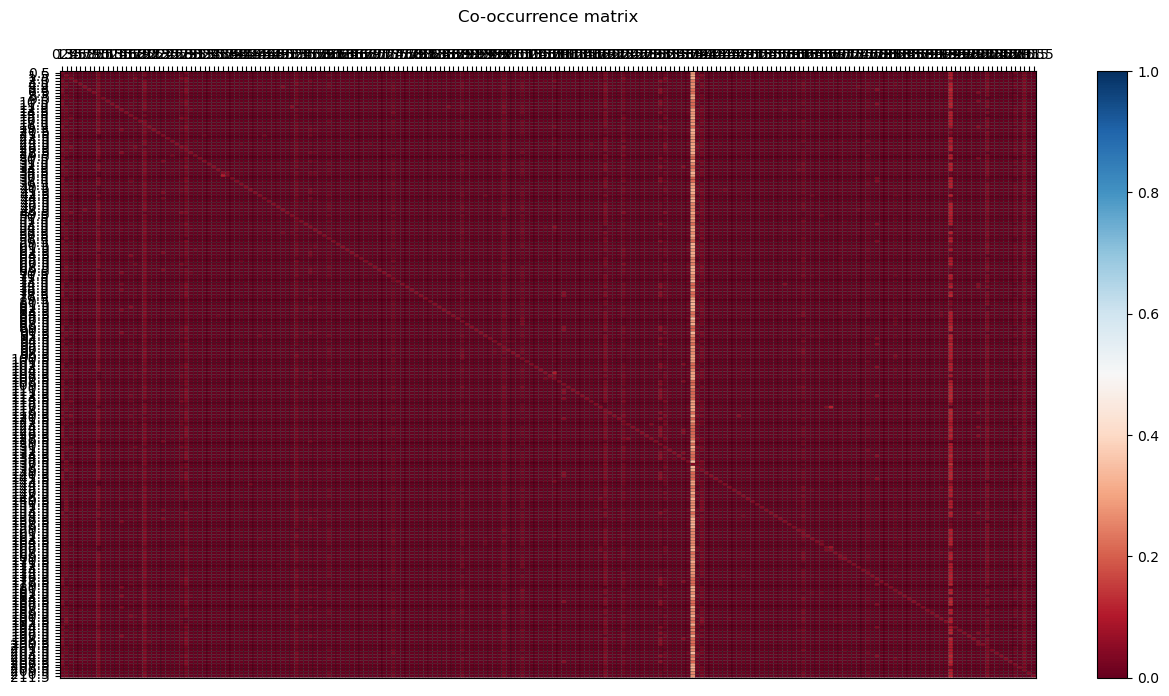

In [6]:
df_co_occ_values = co_ma.values 
 # Plotting
x_axis_size = df_co_occ_values.shape[0]
y_axis_size = df_co_occ_values.shape[1]
title = "Co-occurrence matrix\n"
xlabel= ''#"Labels"
ylabel= ''#"Labels"
#xticklabels = label_header_with_count
#yticklabels = label_header_with_count


comat.heatmap(df_co_occ_values, title, xlabel, ylabel, None, None)

In [7]:
A = co_ma.values


In [8]:
co_ma.columns

Index(['1994', '1995', 'A', 'Abroad', 'Adm support including clerical',
       'Agriculture', 'Alabama', 'Alaska', 'All other',
       'Amer Indian Aleut or Eskimo',
       ...
       'Wholesale trade', 'Widowed', 'Wisconsin', 'Without pay', 'Wyoming',
       'Yes', 'Yugoslavia', 'employee', 'ownbusiness', 'selfemployed'],
      dtype='object', length=212)

In [9]:
from sklearn.preprocessing import OneHotEncoder


oht = OneHotEncoder()

oht.fit(np.array([co_ma.columns]).T)

oht

OneHotEncoder()

In [10]:
x = oht.transform(np.array([co_ma.columns]).T).toarray()

Adj_t = A

#Adj = A

Adj = A

In [11]:
print(np.shape(x))
np.shape(Adj_t)

(212, 212)


(212, 212)

In [50]:
dimpool = 30
model =comat.DiffPool(212,dimpool,212)

In [51]:

import torch
import torch.nn.functional as F

x_t = torch.as_tensor(x).float()
A_t = torch.as_tensor(Adj).float()
T_t = torch.as_tensor(Adj_t).float()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)



def train(epoch):
    model.train()
    loss_all = 0
    for i in range(epoch):
        optimizer.zero_grad()
        output,s1,o1,s2,o2,linkl = model(x_t, A_t)
        #output,s1,o1,linkl = model(x_t, A_t)
        #print(output)
        #print(A_t)
        loss = F.mse_loss(output, T_t)+ 0.1*linkl 
        loss.backward()
        #print(loss)
        loss_all += float(loss)
        optimizer.step()
    return loss_all / epoch


train(1000)

0.009404793290879752

In [52]:
output, s1, A1,s2,A2,LL = model(x_t, A_t)

In [53]:
pf= df_income
columns_categorical = cat_cols

In [54]:
from tqdm import tqdm_notebook as tqdm

elements = []


for row in tqdm(pf.iterrows()):
    categorical_embeddings = []
    for i in columns_categorical:
        #print(i,row[1][i])
        try:
            categorical_embeddings.append(s1[0,np.argmax(oht.transform([np.array([row[1][i]])]).todense()),:].detach().numpy())
        except:
            categorical_embeddings.append(np.zeros((dimpool)))
    elements.append(np.array(categorical_embeddings))

/tmp/ipykernel_151053/3874920952.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for row in tqdm(pf.iterrows()):


0it [00:00, ?it/s]

In [55]:
elements

reshaped_x = (np.reshape(elements,(152504,len(columns_categorical)*dimpool)))

In [56]:
elements[0]

array([[0.00000000e+00, 0.00000000e+00, 2.93250275e+00, 0.00000000e+00,
        0.00000000e+00, 2.21949387e+00, 0.00000000e+00, 0.00000000e+00,
        5.27284241e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.51492500e+00, 0.00000000e+00,
        0.00000000e+00, 3.87917328e+00, 3.22371435e+00, 0.00000000e+00,
        2.02607751e-01, 0.00000000e+00, 0.00000000e+00, 2.98545384e+00,
        5.68444431e-01, 1.59594274e+00, 4.66150951e+00, 2.62497902e+00,
        5.01072454e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.03586340e+00, 0.00000000e+00,
        0.00000000e+00, 2.10641384e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.06100917e+00,
        0.00000000e+00, 0.00000000e+00, 5.80835819e-01, 2.40770793e+00,
        0.00000000e+00, 1.04742348e+00, 1.67958891e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00,

In [57]:
del pf["target"]
np.where(pf.dtypes!="object")[0]

array([ 0, 12, 13, 14, 20, 29])

Index(['age', 'class_of_worker', 'enrolled_in_edu_inst_last_week',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'employment_status', 'capital_gains',
       'capital_losses', 'dividends', 'tax_filer_status',
       'previous_residence_region', 'previous_residence_state',
       'detailed_household_summary_household', 'live_in_this_house_1yr_ago',
       'num_persons_worked_for_employer', 'family_members_under_18',
       'birthplace_father', 'birthplace_mother', 'birthplace_self',
       'citizenship', 'self_employed', 'veteran_questionnaire_filler',
       'veterans_benefits', 'weeks_worked_in_year', 'year', 'target'],
      dtype='object')

In [58]:
pf = pf.iloc[:, [ 0, 12, 13, 14, 20, 29]].reset_index()
del pf["index"]

In [59]:
pf

,age,capital_gains,capital_losses,dividends,num_persons_worked_for_employer,weeks_worked_in_year
0,25,0,0,0,6,52
1,37,0,0,0,0,0
2,33,0,0,250,6,52
3,2,0,0,0,0,0
4,48,0,0,0,1,12
...,...,...,...,...,...,...
152499,9,0,0,0,0,0
152500,85,1173,0,0,0,0
152501,3,0,0,0,0,0
152502,30,0,0,0,2,52


In [60]:
reshaped_x


my_data = pd.concat([pf,pd.DataFrame(reshaped_x)],axis=1)


np.shape(my_data)

(152504, 756)

In [61]:
my_data['target'] = y_train.values

In [62]:
my_data.to_csv('census_diffpool_paired_ttest.csv')

In [31]:
from sklearn.model_selection import train_test_split


X_train2, X_test2, y_train2, y_test2 = train_test_split(my_data,y_train,test_size=0.2, random_state=1500)


In [32]:
X_train2

,age,capital_gains,capital_losses,dividends,num_persons_worked_for_employer,weeks_worked_in_year,0,1,2,3,...,740,741,742,743,744,745,746,747,748,749
97034,46,0,0,0,1,52,0.0,0.000000,0.0,2.013752,...,0.0,0.0,0.0,0.00000,4.753568,0.0,2.350305,0.0,0.0,0.0
39782,60,0,0,0,6,52,0.0,0.455667,0.0,0.563072,...,0.0,0.0,0.0,0.64257,0.322518,0.0,1.713071,0.0,0.0,0.0
52743,11,0,0,0,0,0,0.0,0.000000,0.0,2.787891,...,0.0,0.0,0.0,0.00000,4.753568,0.0,2.350305,0.0,0.0,0.0
62458,25,0,0,0,6,52,0.0,0.455667,0.0,0.563072,...,0.0,0.0,0.0,0.64257,0.322518,0.0,1.713071,0.0,0.0,0.0
15742,40,0,0,0,4,52,0.0,0.455667,0.0,0.563072,...,0.0,0.0,0.0,0.64257,0.322518,0.0,1.713071,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19091,24,0,0,0,6,32,0.0,0.000000,0.0,2.787891,...,0.0,0.0,0.0,0.00000,4.753568,0.0,2.350305,0.0,0.0,0.0
117135,56,0,0,0,6,52,0.0,0.000000,0.0,0.869346,...,0.0,0.0,0.0,0.64257,0.322518,0.0,1.713071,0.0,0.0,0.0
147906,86,0,0,0,0,0,0.0,0.000000,0.0,2.787891,...,0.0,0.0,0.0,0.64257,0.322518,0.0,1.713071,0.0,0.0,0.0
120651,60,0,0,0,0,0,0.0,0.000000,0.0,2.787891,...,0.0,0.0,0.0,0.00000,4.753568,0.0,2.350305,0.0,0.0,0.0


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,auc, roc_auc_score


log = LogisticRegression(max_iter=1000)


stc = StandardScaler()

X_scaled = stc.fit_transform(X_train2.values)

log.fit(X_scaled,y_train2)

y_pred = log.predict(stc.transform(X_test2.values))
y_pred_prob = log.predict_proba(stc.transform(X_test2.values))

print(confusion_matrix(y_test2,y_pred))
print(classification_report(y_test2,y_pred))

print(roc_auc_score(y_test2,y_pred_prob[:,1]))

[[28371   225]
 [ 1293   612]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     28596
           1       0.73      0.32      0.45      1905

    accuracy                           0.95     30501
   macro avg       0.84      0.66      0.71     30501
weighted avg       0.94      0.95      0.94     30501

0.9391344860742596


In [34]:
test_pf = df_income_test.copy()

In [35]:
from tqdm import tqdm_notebook as tqdm

elements = []


for row in tqdm(test_pf.iterrows()):
    categorical_embeddings = []
    for i in columns_categorical:
        #print(i,row[1][i])
        try:
            categorical_embeddings.append(s1[0,np.argmax(oht.transform([np.array([row[1][i]])]).todense()),:].detach().numpy())
        except:
            categorical_embeddings.append(np.zeros((dimpool)))
    elements.append(np.array(categorical_embeddings))

/tmp/ipykernel_151053/614757573.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for row in tqdm(test_pf.iterrows()):


0it [00:00, ?it/s]

In [36]:
reshaped_x_test = (np.reshape(elements,(38057,len(columns_categorical)*dimpool)))


test_target = y_test.copy()


test_pf = test_pf.iloc[:, [ 0, 12, 13, 14, 20, 29]].reset_index()

test_pf

,index,age,capital_gains,capital_losses,dividends,num_persons_worked_for_employer,weeks_worked_in_year
0,20422,10,0,0,0,0,0
1,124364,47,3103,0,0,6,40
2,154387,47,0,0,0,3,52
3,153013,55,0,0,0,6,52
4,158341,45,0,0,0,0,0
...,...,...,...,...,...,...,...
38052,10895,23,0,0,0,2,52
38053,77576,7,0,0,0,0,0
38054,155868,12,0,0,0,0,0
38055,86995,38,0,0,0,1,32


In [37]:
del test_pf["index"]

In [38]:
my_test_data = pd.concat([test_pf,pd.DataFrame(reshaped_x_test)],axis=1)
my_test_data


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,auc, roc_auc_score



y_pred_test = log.predict(stc.transform(my_test_data.values))
y_pred_prob_test = log.predict_proba(stc.transform(my_test_data.values))

print(confusion_matrix(test_target,y_pred_test))
print(classification_report(test_target,y_pred_test))

print(roc_auc_score(test_target,y_pred_prob_test[:,1]))

[[35411   332]
 [ 1639   675]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     35743
           1       0.67      0.29      0.41      2314

    accuracy                           0.95     38057
   macro avg       0.81      0.64      0.69     38057
weighted avg       0.94      0.95      0.94     38057

0.9343214261438213
